In [10]:
import pandas as pd
df = pd.read_csv("A.csv")

df= df.drop(['Low', 'High','Volume','Adjusted Close'], axis=1)
df
df['Stock Ticker']=['A']*len(df.index)

In [11]:
df

,Date,Open,Close,Stock Ticker
0,18-11-1999,32.546494,31.473534,A
1,19-11-1999,30.713518,28.880545,A
2,22-11-1999,29.551144,31.473534,A
3,23-11-1999,30.400572,28.612303,A
4,24-11-1999,28.701717,29.372318,A
...,...,...,...,...
5799,06-12-2022,152.149994,151.350006,A
5800,07-12-2022,151.229996,153.729996,A
5801,08-12-2022,154.419998,156.279999,A
5802,09-12-2022,155.669998,152.949997,A


In [12]:
df['50dayEWM'] = df['Open'].ewm(span=50, adjust=False).mean()
df

,Date,Open,Close,Stock Ticker,50dayEWM
0,18-11-1999,32.546494,31.473534,A,32.546494
1,19-11-1999,30.713518,28.880545,A,32.474612
2,22-11-1999,29.551144,31.473534,A,32.359966
3,23-11-1999,30.400572,28.612303,A,32.283127
4,24-11-1999,28.701717,29.372318,A,32.142680
...,...,...,...,...,...
5799,06-12-2022,152.149994,151.350006,A,141.778095
5800,07-12-2022,151.229996,153.729996,A,142.148758
5801,08-12-2022,154.419998,156.279999,A,142.629983
5802,09-12-2022,155.669998,152.949997,A,143.141356


In [13]:
df['200dayEWM'] = df['Open'].ewm(span=200, adjust=False).mean()


In [14]:
df

,Date,Open,Close,Stock Ticker,50dayEWM,200dayEWM
0,18-11-1999,32.546494,31.473534,A,32.546494,32.546494
1,19-11-1999,30.713518,28.880545,A,32.474612,32.528255
2,22-11-1999,29.551144,31.473534,A,32.359966,32.498632
3,23-11-1999,30.400572,28.612303,A,32.283127,32.477756
4,24-11-1999,28.701717,29.372318,A,32.142680,32.440183
...,...,...,...,...,...,...
5799,06-12-2022,152.149994,151.350006,A,141.778095,134.801206
5800,07-12-2022,151.229996,153.729996,A,142.148758,134.964677
5801,08-12-2022,154.419998,156.279999,A,142.629983,135.158262
5802,09-12-2022,155.669998,152.949997,A,143.141356,135.362359


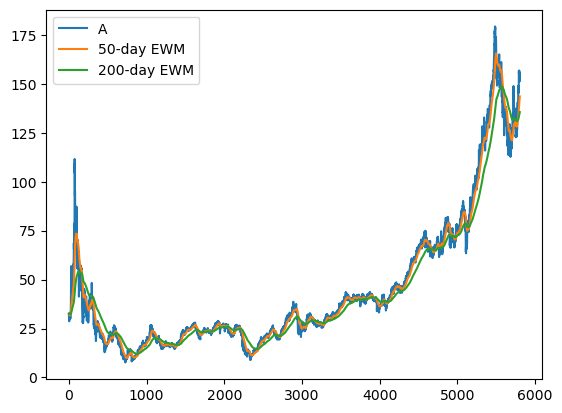

In [52]:
import matplotlib.pyplot as plt

plt.plot(df['Open'], label='A')
plt.plot(df['50dayEWM'], label='50-day EWM')
plt.plot(df['200dayEWM'], label='200-day EWM')
plt.legend(loc=2)



In [17]:
previous_50 = df['50dayEWM'].shift(1)
previous_200 = df['200dayEWM'].shift(1)
crossing = (((df['50dayEWM'] <= df['200dayEWM']) & (previous_50 >= previous_200))
            | ((df['50dayEWM'] >= df['200dayEWM']) & (previous_50 <= previous_200)))

In [18]:
crossing

0       False
1        True
2       False
3       False
4       False
        ...  
5799    False
5800    False
5801    False
5802    False
5803    False
Length: 5804, dtype: bool

In [32]:
crossing_dates = df.loc[crossing]
print(crossing_dates)

            Date        Open       Close Stock Ticker    50dayEWM   200dayEWM
1     19-11-1999   30.713518   28.880545            A   32.474612   32.528255
26    28-12-1999   38.805435   43.991417            A   32.498820   32.439428
171   25-07-2000   35.094776   32.010014            A   52.127683   52.588328
581   18-03-2002   26.688126   26.509298            A   22.127274   22.120136
623   16-05-2002   21.280401   21.173103            A   22.407573   22.432859
899   20-06-2003   13.948498   13.633763            A   12.319332   12.295188
1140  04-06-2004   18.097282   18.040056            A   19.768038   19.794274
1404  22-06-2005   17.725323   17.618027            A   16.712255   16.705530
1668  11-07-2006   21.924177   21.587982            A   24.001783   24.051983
1741  23-10-2006   25.100143   24.885551            A   23.207470   23.195596
1828  01-03-2007   22.281832   22.489269            A   23.499899   23.512424
1854  09-04-2007   24.907009   25.078684            A   23.50231

In [84]:
df['Date'] = pd.to_datetime(df['Date'])
df

,Date,Open,Close,Stock Ticker,50dayEWM,200dayEWM
0,1999-11-18,32.546494,31.473534,A,32.546494,32.546494
1,1999-11-19,30.713518,28.880545,A,32.474612,32.528255
2,1999-11-22,29.551144,31.473534,A,32.359966,32.498632
3,1999-11-23,30.400572,28.612303,A,32.283127,32.477756
4,1999-11-24,28.701717,29.372318,A,32.142680,32.440183
...,...,...,...,...,...,...
5799,2022-06-12,152.149994,151.350006,A,141.778095,134.801206
5800,2022-07-12,151.229996,153.729996,A,142.148758,134.964677
5801,2022-08-12,154.419998,156.279999,A,142.629983,135.158262
5802,2022-09-12,155.669998,152.949997,A,143.141356,135.362359


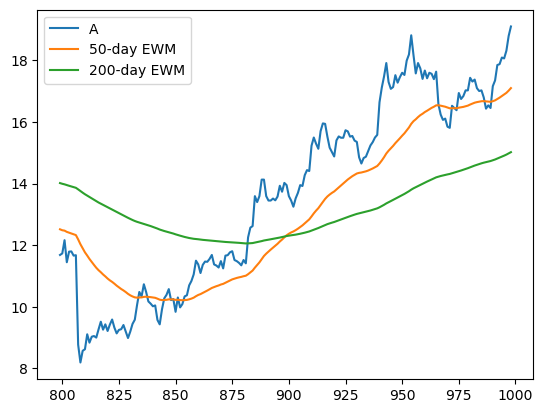

In [85]:
df1= df.iloc[799:999]
df1
plt.plot(df1['Open'], label='A')
plt.plot(df1['50dayEWM'], label='50-day EWM')
plt.plot(df1['200dayEWM'], label='200-day EWM')
plt.legend(loc=2)

In [87]:
crossing_dates.index

Int64Index([   1,   26,  171,  581,  623,  899, 1140, 1404, 1668, 1741, 1828,
            1854, 2054, 2150, 2218, 2443, 2690, 2732, 2956, 3070, 3170, 3300,
            3759, 3764, 3821, 3838, 3927, 4044, 4072, 4118, 4675, 4725, 4949,
            4986, 5116, 5155, 5590, 5781],
           dtype='int64')

In [88]:
for i in crossing_dates.index:
    if i>200:
        
        

In [89]:
previous_50 = df['50dayEWM'].shift(1)
previous_200 = df['200dayEWM'].shift(1)
buys = (((df['50dayEWM'] <= df['200dayEWM']) & (previous_50 >= previous_200)))
buys

0       False
1        True
2       False
3       False
4       False
        ...  
5799    False
5800    False
5801    False
5802    False
5803    False
Length: 5804, dtype: bool

In [90]:
previous_50 = df['50dayEWM'].shift(1)
previous_200 = df['200dayEWM'].shift(1)
sells = (((df['50dayEWM'] >= df['200dayEWM']) & (previous_50 <= previous_200)))
sells

0       False
1       False
2       False
3       False
4       False
        ...  
5799    False
5800    False
5801    False
5802    False
5803    False
Length: 5804, dtype: bool

In [93]:
buy_dates = df.loc[buys]

print(buy_dates.index)

Int64Index([   1,  171,  623, 1140, 1668, 1828, 2054, 2218, 2690, 2956, 3170,
            3759, 3821, 3927, 4072, 4675, 4949, 5116, 5590],
           dtype='int64')


In [95]:
sell_dates = df.loc[sells]

print(sell_dates.index)

Int64Index([  26,  581,  899, 1404, 1741, 1854, 2150, 2443, 2732, 3070, 3300,
            3764, 3838, 4044, 4118, 4725, 4986, 5155, 5781],
           dtype='int64')


In [144]:
buyindex=df.index[buys].tolist()
print(buyindex)
buy_dates
profit=0
loss=0
for i in buyindex:
    if i>200:
        buy=df.loc[i]['Open']
        print("-----")

        for j in range(i,i+265):
            
            p=df.loc[j]['Open']-buy
            if p/buy<-0.1:
                print(buy,df.loc[j]['Open'],p,j-i)
                print("stoploss hit")
                loss=loss+1
                break
            elif p/buy>0.1:
                print(buy,df.loc[j]['Open'],p,j-i)
                profit=profit+1
                break
        print(j-i)
        if j-i==264:
            if buy<df.loc[j]['Open']:
                print(buy,df.loc[j]['Open'],p,j-i)
                profit=profit+1
            else :
                print(buy,df.loc[j]['Open'],p,j-i)
                print("yearend exit")
                loss=loss+1


                
        



[1, 171, 623, 1140, 1668, 1828, 2054, 2218, 2690, 2956, 3170, 3759, 3821, 3927, 4072, 4675, 4949, 5116, 5590]
-----
21.2804012298584 19.02718162536621 -2.2532196044921875 9
stoploss hit
9
-----
18.09728240966797 21.108726501464844 3.011444091796875 15
15
-----
21.924177169799805 19.620887756347656 -2.3032894134521484 21
stoploss hit
21
-----
22.281831741333008 24.799713134765625 2.517881393432617 24
24
-----
22.6680965423584 25.32904052734375 2.6609439849853516 80
80
-----
21.802574157714844 19.49928474426269 -2.303289413452152 15
stoploss hit
15
-----
20.27897071838379 22.93991470336914 2.6609439849853516 39
39
-----
22.7038631439209 25.350500106811523 2.646636962890625 6
6
-----
27.18168830871582 30.164520263671875 2.9828319549560547 129
129
-----
39.048641204833984 43.59000015258789 4.541358947753906 112
112
-----
38.0 41.88999938964844 3.8899993896484375 16
16
-----
38.88999938964844 33.869998931884766 -5.020000457763672 37
stoploss hit
37
-----
37.27000045776367 41.18000030517578 

In [145]:
print(profit,loss)

12 5


,Date,Open
26,1999-12-28,38.805435
581,2002-03-18,26.688126
899,2003-06-20,13.948498
1404,2005-06-22,17.725323
1741,2006-10-23,25.100143
1854,2007-09-04,24.907009
2150,2008-10-06,26.015738
2443,2009-07-08,16.917025
2732,2010-09-30,23.440628
3070,2012-02-02,31.623749
